# 3 days early prediction

2024-09-26 20:23:42,721 - INFO - Successfully read the file
2024-09-26 20:23:42,722 - INFO - Starting training for a 1-day forecast.


2024-09-26 20:23:42,955 - INFO - Epoch 1/100, Loss: 0.0146
2024-09-26 20:23:43,111 - INFO - Epoch 2/100, Loss: 0.0019
2024-09-26 20:23:43,266 - INFO - Epoch 3/100, Loss: 0.0049
2024-09-26 20:23:43,396 - INFO - Epoch 4/100, Loss: 0.0072
2024-09-26 20:23:43,577 - INFO - Epoch 5/100, Loss: 0.0045
2024-09-26 20:23:43,737 - INFO - Epoch 6/100, Loss: 0.0038
2024-09-26 20:23:43,918 - INFO - Epoch 7/100, Loss: 0.0023
2024-09-26 20:23:44,042 - INFO - Epoch 8/100, Loss: 0.0016
2024-09-26 20:23:44,174 - INFO - Epoch 9/100, Loss: 0.0011
2024-09-26 20:23:44,347 - INFO - Epoch 10/100, Loss: 0.0007
2024-09-26 20:23:44,470 - INFO - Epoch 11/100, Loss: 0.0031
2024-09-26 20:23:44,597 - INFO - Epoch 12/100, Loss: 0.0031
2024-09-26 20:23:44,733 - INFO - Epoch 13/100, Loss: 0.0006
2024-09-26 20:23:44,882 - INFO - Epoch 14/100, Loss: 0.0032
2024-09-26 20:23:45,026 - INFO - Epoch 15/100, Loss: 0.0016
2024-09-26 20:23:45,152 - INFO - Epoch 16/100, Loss: 0.0011
2024-09-26 20:23:45,281 - INFO - Epoch 17/100, Lo

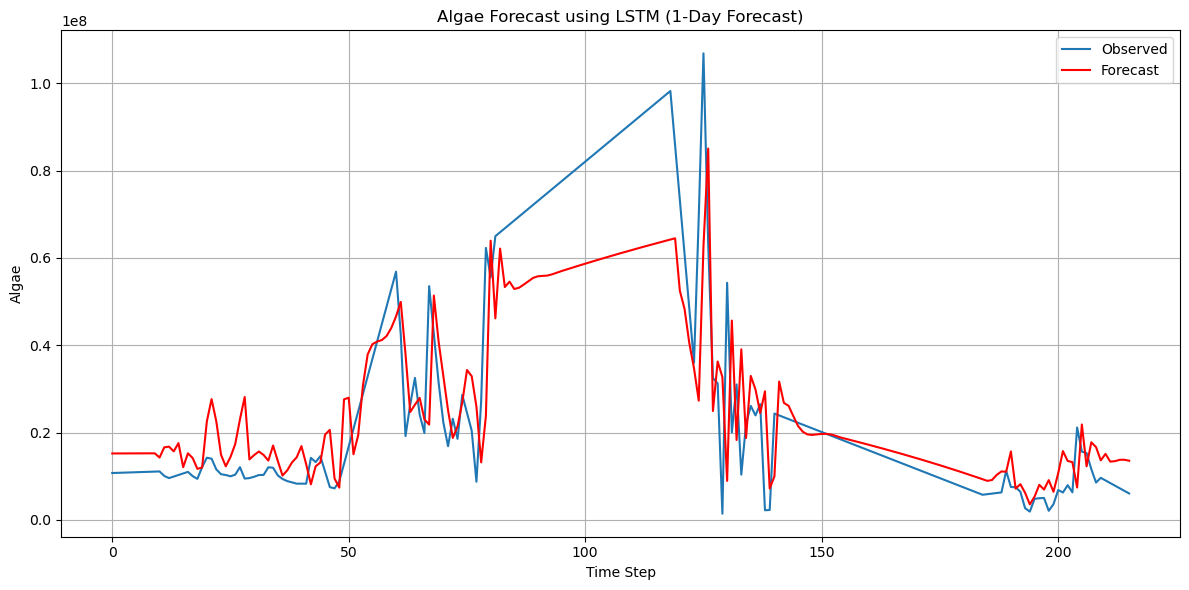

2024-09-26 20:24:04,937 - INFO - Starting training for a 3-day forecast.
2024-09-26 20:24:05,113 - INFO - Epoch 1/100, Loss: 0.0266
2024-09-26 20:24:05,297 - INFO - Epoch 2/100, Loss: 0.0081
2024-09-26 20:24:05,428 - INFO - Epoch 3/100, Loss: 0.0009
2024-09-26 20:24:05,589 - INFO - Epoch 4/100, Loss: 0.0011
2024-09-26 20:24:05,752 - INFO - Epoch 5/100, Loss: 0.0042
2024-09-26 20:24:05,916 - INFO - Epoch 6/100, Loss: 0.0005
2024-09-26 20:24:06,071 - INFO - Epoch 7/100, Loss: 0.0051
2024-09-26 20:24:06,224 - INFO - Epoch 8/100, Loss: 0.0035
2024-09-26 20:24:06,372 - INFO - Epoch 9/100, Loss: 0.0028
2024-09-26 20:24:06,513 - INFO - Epoch 10/100, Loss: 0.0004
2024-09-26 20:24:06,648 - INFO - Epoch 11/100, Loss: 0.0056
2024-09-26 20:24:06,812 - INFO - Epoch 12/100, Loss: 0.0008
2024-09-26 20:24:06,977 - INFO - Epoch 13/100, Loss: 0.0012
2024-09-26 20:24:07,129 - INFO - Epoch 14/100, Loss: 0.0035
2024-09-26 20:24:07,261 - INFO - Epoch 15/100, Loss: 0.0034
2024-09-26 20:24:07,402 - INFO - Epo

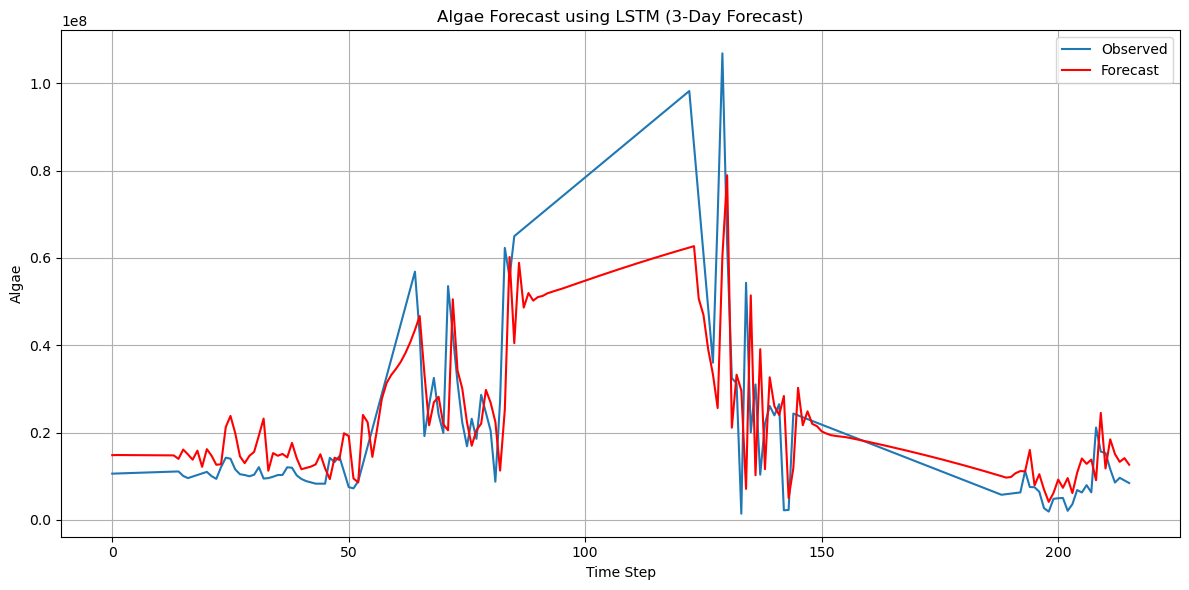

2024-09-26 20:24:21,133 - INFO - Starting training for a 7-day forecast.
2024-09-26 20:24:21,348 - INFO - Epoch 1/100, Loss: 0.0049
2024-09-26 20:24:21,489 - INFO - Epoch 2/100, Loss: 0.0049
2024-09-26 20:24:21,608 - INFO - Epoch 3/100, Loss: 0.0048
2024-09-26 20:24:21,729 - INFO - Epoch 4/100, Loss: 0.0103
2024-09-26 20:24:21,870 - INFO - Epoch 5/100, Loss: 0.0004
2024-09-26 20:24:22,008 - INFO - Epoch 6/100, Loss: 0.0238
2024-09-26 20:24:22,160 - INFO - Epoch 7/100, Loss: 0.0035
2024-09-26 20:24:22,304 - INFO - Epoch 8/100, Loss: 0.0020
2024-09-26 20:24:22,430 - INFO - Epoch 9/100, Loss: 0.0025
2024-09-26 20:24:22,578 - INFO - Epoch 10/100, Loss: 0.0010
2024-09-26 20:24:22,700 - INFO - Epoch 11/100, Loss: 0.0011
2024-09-26 20:24:22,836 - INFO - Epoch 12/100, Loss: 0.0011
2024-09-26 20:24:22,985 - INFO - Epoch 13/100, Loss: 0.0007
2024-09-26 20:24:23,118 - INFO - Epoch 14/100, Loss: 0.0007
2024-09-26 20:24:23,244 - INFO - Epoch 15/100, Loss: 0.0007
2024-09-26 20:24:23,387 - INFO - Epo

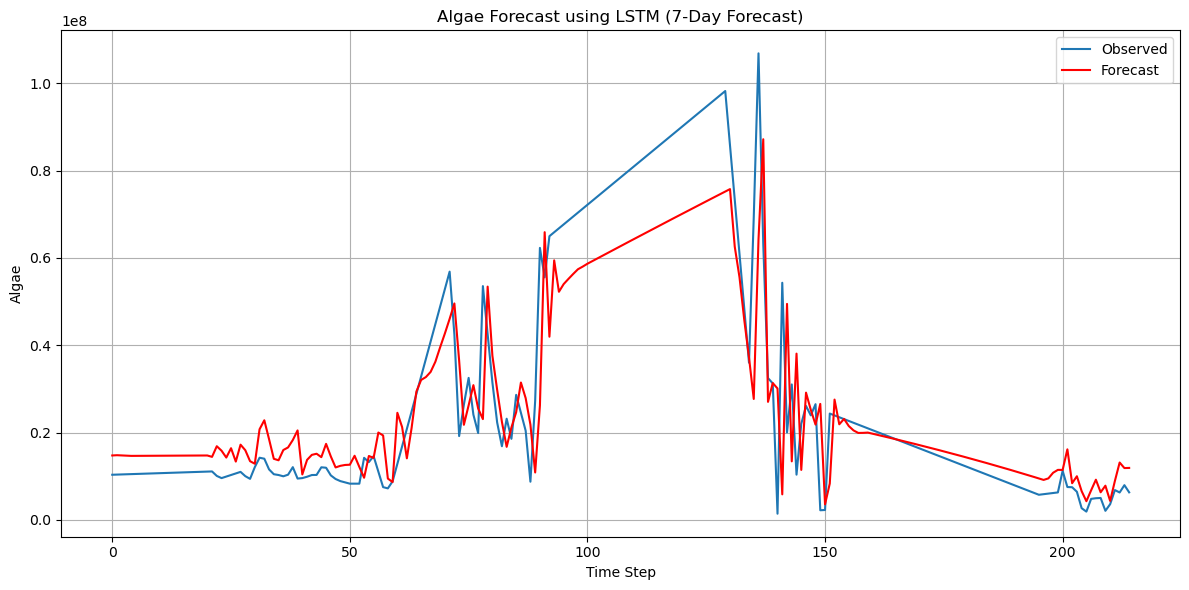

2024-09-26 20:24:35,804 - INFO - The highest forecast accuracy is for the 7-day forecast with RMSE: 11559111.0230 and MAE: 8000332.8609


In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
def preprocess_data(df, sequence_length, prediction_step=3):
    # Check if 'date' is a column in the DataFrame
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)

    df = df.ffill()

    features = ['temp', 'oxygen', 'NH3', 'TP', 'TN', 'algae']
    df_features = df[features]

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=features, index=df.index)

    # Create sequences
    data = []
    for i in range(len(df_scaled) - sequence_length - prediction_step + 1):
        data.append(df_scaled.iloc[i:i+sequence_length].values)
    data = np.array(data)

    # Split into inputs and targets
    X = data[:, :-prediction_step, :]
    y = data[:, -prediction_step, features.index('algae')]

    return X, y, scaler

def create_dataloaders(X, y, batch_size, train_size=0.8):
    train_size = int(len(X) * train_size)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
    test_dataset = TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

def train_lstm_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for i, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
        logging.info(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

def evaluate_lstm_model(model, test_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, target in test_loader:
            output = model(inputs)
            predictions.append(output.squeeze().numpy())
            targets.append(target.numpy())
    predictions = np.concatenate(predictions)
    targets = np.concatenate(targets)
    return predictions, targets

def plot_forecast(targets, predictions, title='Algae Forecast using LSTM', xlabel='Time Step', ylabel='Algae', start_idx=0, end_idx=None):
    if end_idx is None:
        end_idx = len(targets)
    plt.figure(figsize=(12, 6))
    plt.plot(targets[start_idx:end_idx], label='Observed')
    plt.plot(predictions[start_idx:end_idx], label='Forecast', color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



def main():
    try:
        df = pd.read_csv('/root/Download/BloomPredict/AlgaeBloomForecast-20240926/merged_data.csv', encoding='utf-8')
        logging.info("Successfully read the file")

        sequence_length = 15  # Number of previous time steps to consider for prediction
        batch_size = 16
        input_size = 6  # Assuming there are 6 features
        hidden_size = 64
        num_layers = 2
        output_size = 1
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam
        epochs = 100
        accuracy_records = []

        for prediction_step in [1, 3, 7]:
            logging.info(f"Starting training for a {prediction_step}-day forecast.")
            X, y, scaler = preprocess_data(df, sequence_length, prediction_step)

            train_loader, test_loader = create_dataloaders(X, y, batch_size)

            # 为每个预测任务重新初始化模型
            model = LSTMModel(input_size, hidden_size, num_layers, output_size)
            # 为每个预测任务重新创建优化器实例
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

            train_lstm_model(model, train_loader, criterion, optimizer, epochs)

            predictions, targets = evaluate_lstm_model(model, test_loader)

            # Inverse transform the predictions and targets
            predictions = scaler.inverse_transform(np.concatenate((np.zeros((len(predictions), 5)), predictions.reshape(-1, 1)), axis=1))[:, 5]
            targets = scaler.inverse_transform(np.concatenate((np.zeros((len(targets), 5)), targets.reshape(-1, 1)), axis=1))[:, 5]

            rmse = np.sqrt(mean_squared_error(targets, predictions))
            mae = mean_absolute_error(targets, predictions)
            logging.info(f"\nForecast Accuracy for {prediction_step}-day forecast:")
            logging.info(f"RMSE: {rmse:.4f}")
            logging.info(f"MAE: {mae:.4f}")

            # Plot the forecast
            plot_forecast(targets, predictions, title=f'Algae Forecast using LSTM ({prediction_step}-Day Forecast)')
            # 将预测精度信息添加到列表中
            accuracy_records.append({'prediction_step': prediction_step, 'rmse': rmse, 'mae': mae})

        # 找出最高预测精度的模型
        best_accuracy = min(accuracy_records, key=lambda x: x['rmse'])  # 假设以RMSE为准
        logging.info(f"The highest forecast accuracy is for the {best_accuracy['prediction_step']}-day forecast with RMSE: {best_accuracy['rmse']:.4f} and MAE: {best_accuracy['mae']:.4f}")

    except Exception as e:
        logging.error(f"An error occurred in main: {str(e)}")
        import traceback
        logging.error(traceback.format_exc())

if __name__ == "__main__":
    main()

